In [ ]:
import os
os.chdir(r"/content/drive/MyDrive/Internship/data")

In [ ]:
import pandas as pd
import re
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import re, string, unicodedata
import nltk
from collections import Counter

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer


from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.metrics import classification_report


import tensorflow as tf
from tensorflow.keras import callbacks
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [ ]:
data = pd.read_csv('data_webunpas_fixx.csv',encoding="ISO-8859-1")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  510 non-null    object
 1   Likes    513 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.1+ KB


In [ ]:
data

,Comment,Likes
0,Saya mulai belajar coding web umur 28. Bersyuk...,173
1,"Saya baru umur 15 tahun, semoga dengan belajar...",310
2,Semangat dan sukses selalu pak Sandhika. Konte...,9
3,Saya belajar terus di wpu dari html sampe back...,36
4,"usia saya sudah kepala 4, tanpa backgorund IT ...",4
...,...,...
508,sedih,0
509,Panik lo,0
510,"Tolong teman-teman subscribe channel aku ya, a...",0
511,"Berita terkini, seorang bocah dimakan buaya fu...",0


In [ ]:
data.loc[data["Comment"]=="Aku dapet 86 juta dari apk terbaru apk nya udah aku share di youtubeku semoga bermanfaat ..."]

,Comment,Likes
173,Aku dapet 86 juta dari apk terbaru apk nya uda...,0


In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
data.head()

,Comment,Likes
0,Saya mulai belajar coding web umur 28. Bersyuk...,173
1,"Saya baru umur 15 tahun, semoga dengan belajar...",310
2,Semangat dan sukses selalu pak Sandhika. Konte...,9
3,Saya belajar terus di wpu dari html sampe back...,36
4,"usia saya sudah kepala 4, tanpa backgorund IT ...",4


In [ ]:
data.isnull().sum()

Comment    3
Likes      0
dtype: int64

In [ ]:
data = data.drop('Likes', axis=1)
data

,Comment
0,Saya mulai belajar coding web umur 28. Bersyuk...
1,"Saya baru umur 15 tahun, semoga dengan belajar..."
2,Semangat dan sukses selalu pak Sandhika. Konte...
3,Saya belajar terus di wpu dari html sampe back...
4,"usia saya sudah kepala 4, tanpa backgorund IT ..."
...,...
508,sedih
509,Panik lo
510,"Tolong teman-teman subscribe channel aku ya, a..."
511,"Berita terkini, seorang bocah dimakan buaya fu..."


In [ ]:
data.dropna()

,Comment
0,Saya mulai belajar coding web umur 28. Bersyuk...
1,"Saya baru umur 15 tahun, semoga dengan belajar..."
2,Semangat dan sukses selalu pak Sandhika. Konte...
3,Saya belajar terus di wpu dari html sampe back...
4,"usia saya sudah kepala 4, tanpa backgorund IT ..."
...,...
508,sedih
509,Panik lo
510,"Tolong teman-teman subscribe channel aku ya, a..."
511,"Berita terkini, seorang bocah dimakan buaya fu..."


In [ ]:
data.dtypes

Comment    object
dtype: object

In [ ]:
data[data['Comment'].isna()]

,Comment
186,NaN
447,NaN
499,NaN


In [ ]:
data = data.drop(data.index[[186, 447, 499]])

In [ ]:
data['word_len'] = data['Comment'].apply(lambda x:len(nltk.word_tokenize(x)))
data.head(10)

,Comment,word_len
0,Saya mulai belajar coding web umur 28. Bersyuk...,40
1,"Saya baru umur 15 tahun, semoga dengan belajar...",26
2,Semangat dan sukses selalu pak Sandhika. Konte...,58
3,Saya belajar terus di wpu dari html sampe back...,20
4,"usia saya sudah kepala 4, tanpa backgorund IT ...",70
5,"Pak Sandhika, makasih pak. Saya lulusan Teknik...",60
6,Saya nobatkan pak sandhika sebagai top global ...,13
7,setelah melihat channel ini saya sangat termot...,21
8,saya yakin pak dosen ini bisa ambil pekerjaan ...,58
9,07:41 saya juga lg disuruh bikin project web s...,31


In [ ]:
pip install sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data

,Comment,word_len
0,Saya mulai belajar coding web umur 28. Bersyuk...,40
1,"Saya baru umur 15 tahun, semoga dengan belajar...",26
2,Semangat dan sukses selalu pak Sandhika. Konte...,58
3,Saya belajar terus di wpu dari html sampe back...,20
4,"usia saya sudah kepala 4, tanpa backgorund IT ...",70
...,...,...
508,sedih,1
509,Panik lo,2
510,"Tolong teman-teman subscribe channel aku ya, a...",17
511,"Berita terkini, seorang bocah dimakan buaya fu...",12


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 0 to 512
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Comment   510 non-null    object
 1   word_len  510 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 12.0+ KB


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory


data['Comment'] = data['Comment'].astype(str)
def preprocessing(comment):
    comment = comment.lower()
    comment = re.sub('[â]', '', comment)
    comment = re.sub(r'[^\w\s]', ' ', comment)
    all_stopwords = stopwords.words('indonesian')
    from nltk.tokenize import word_tokenize
    tokens = word_tokenize(comment)
    comment = [word for word in tokens if not word in all_stopwords]
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    comment = [stemmer.stem(word) for word in comment]
    preprocessed_text = " ".join(comment)
    return preprocessed_text

In [ ]:
data['Comment']=data['Comment'].apply(lambda x:preprocessing(x))
data.head()

,Comment,word_len
0,ajar coding web umur 28 syukur temu channel il...,40
1,umur 15 moga ajar channel hasil uang bantu ora...,26
2,semangat sukses sandhika konten konten motivas...,58
3,ajar wpu html sampe backend pakai kerja terima...,20
4,usia kepala 4 backgorund it kerja gak hubugann...,70


In [ ]:
data

,Comment,word_len
0,ajar coding web umur 28 syukur temu channel il...,40
1,umur 15 moga ajar channel hasil uang bantu ora...,26
2,semangat sukses sandhika konten konten motivas...,58
3,ajar wpu html sampe backend pakai kerja terima...,20
4,usia kepala 4 backgorund it kerja gak hubugann...,70
...,...,...
508,sedih,1
509,panik lo,2
510,tolong teman teman subscribe channel ya youtub...,17
511,berita kini bocah makan buaya full video https...,12


In [ ]:
pip install snorkel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from snorkel.labeling import labeling_function
import re

HAM = 0
SPAM = 1

@labeling_function()
def promo(x):
    keywords = ["apk", "share", "viral", "subscribe"]
    return SPAM if any(word in x.Comment.lower() for word in keywords) else HAM

@labeling_function()
def url(x):
    keywords = ["http"]
    return SPAM if any(word in x.Comment.lower() for word in keywords) else HAM

@labeling_function()
def regex_url(x):
    return SPAM if re.findall(r"https.*:",x.Comment,flags=re.I) else HAM

# @labeling_function()
# def word_length_lf(x):
#     if x.word_len < 3:
#         return SPAM
#     return HAM

In [ ]:
from snorkel.labeling import PandasLFApplier
lfs = [promo, url, regex_url]
applier = PandasLFApplier(lfs=lfs)
L_train = applier.apply(df=data)

100%|██████████| 510/510 [00:00<00:00, 12609.84it/s]


In [ ]:
L_train

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [1, 0, 0],
       [0, 1, 0],
       [1, 1, 0]])

In [ ]:
from snorkel.labeling import LFAnalysis
LFAnalysis(L=L_train, lfs=lfs).lf_summary()

,j,Polarity,Coverage,Overlaps,Conflicts
promo,0,"[0, 1]",1.0,1.0,0.015686
url,1,"[0, 1]",1.0,1.0,0.015686
regex_url,2,[0],1.0,1.0,0.015686


In [ ]:
from snorkel.labeling.model import LabelModel

label_model = LabelModel(cardinality=2,verbose=True)
label_model.fit(L_train=L_train,n_epochs=500,log_freq=100,seed=123)

100%|██████████| 500/500 [00:00<00:00, 798.00epoch/s]


In [ ]:
data['Labels'] = label_model.predict(L=L_train,tie_break_policy="ham")

In [ ]:
data

,Comment,word_len,Labels
0,ajar coding web umur 28 syukur temu channel il...,40,0
1,umur 15 moga ajar channel hasil uang bantu ora...,26,0
2,semangat sukses sandhika konten konten motivas...,58,0
3,ajar wpu html sampe backend pakai kerja terima...,20,0
4,usia kepala 4 backgorund it kerja gak hubugann...,70,0
...,...,...,...
508,sedih,1,0
509,panik lo,2,0
510,tolong teman teman subscribe channel ya youtub...,17,1
511,berita kini bocah makan buaya full video https...,12,1


In [ ]:
spam_comment = data[data["Labels"]==1]
spam_comment

,Comment,word_len,Labels
11,inspirasi video izin share ngoding 2020 start ...,83,1
108,coba saran teman teman fokus bener bener hasil...,26,1
173,dapet 86 juta apk baru apk nya udah share yout...,17,1
234,kasih dapat orang milik virtual assistant anak...,144,1
469,viral siri google assistantversi windows karya...,13,1
510,tolong teman teman subscribe channel ya youtub...,17,1
511,berita kini bocah makan buaya full video https...,12,1
512,barusan uang 32 juta make apk https apkbagiuan...,11,1


In [ ]:
data['Labels'].value_counts()

0    502
1      8
Name: Labels, dtype: int64

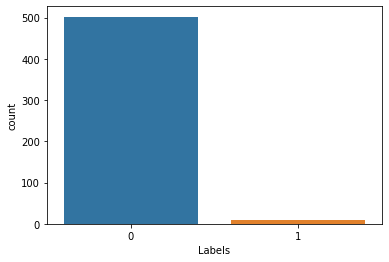

In [ ]:
sns.countplot(x = "Labels", data = data)
plt.rcParams["figure.dpi"] = 360

In [ ]:
cv = CountVectorizer()
X = cv.fit_transform(data["Comment"]).toarray()
# X = data["Comment"].values  
X = data.iloc[:, 0].values
y = data.iloc[:, -1].values
# y = data['Labels'].values

In [ ]:
X = X.reshape(-1,1)

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


over = RandomOverSampler(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.8)
# oversampling
X_over, y_over = over.fit_resample(X, y)
print(f"Oversampled: {Counter(y_over)}")
# undersampling 
X_ou, y_ou = under.fit_resample(X_over, y_over)
print(f"Combined Random Sampling: {Counter(y_ou)}")

Oversampled: Counter({0: 502, 1: 251})
Combined Random Sampling: Counter({0: 313, 1: 251})


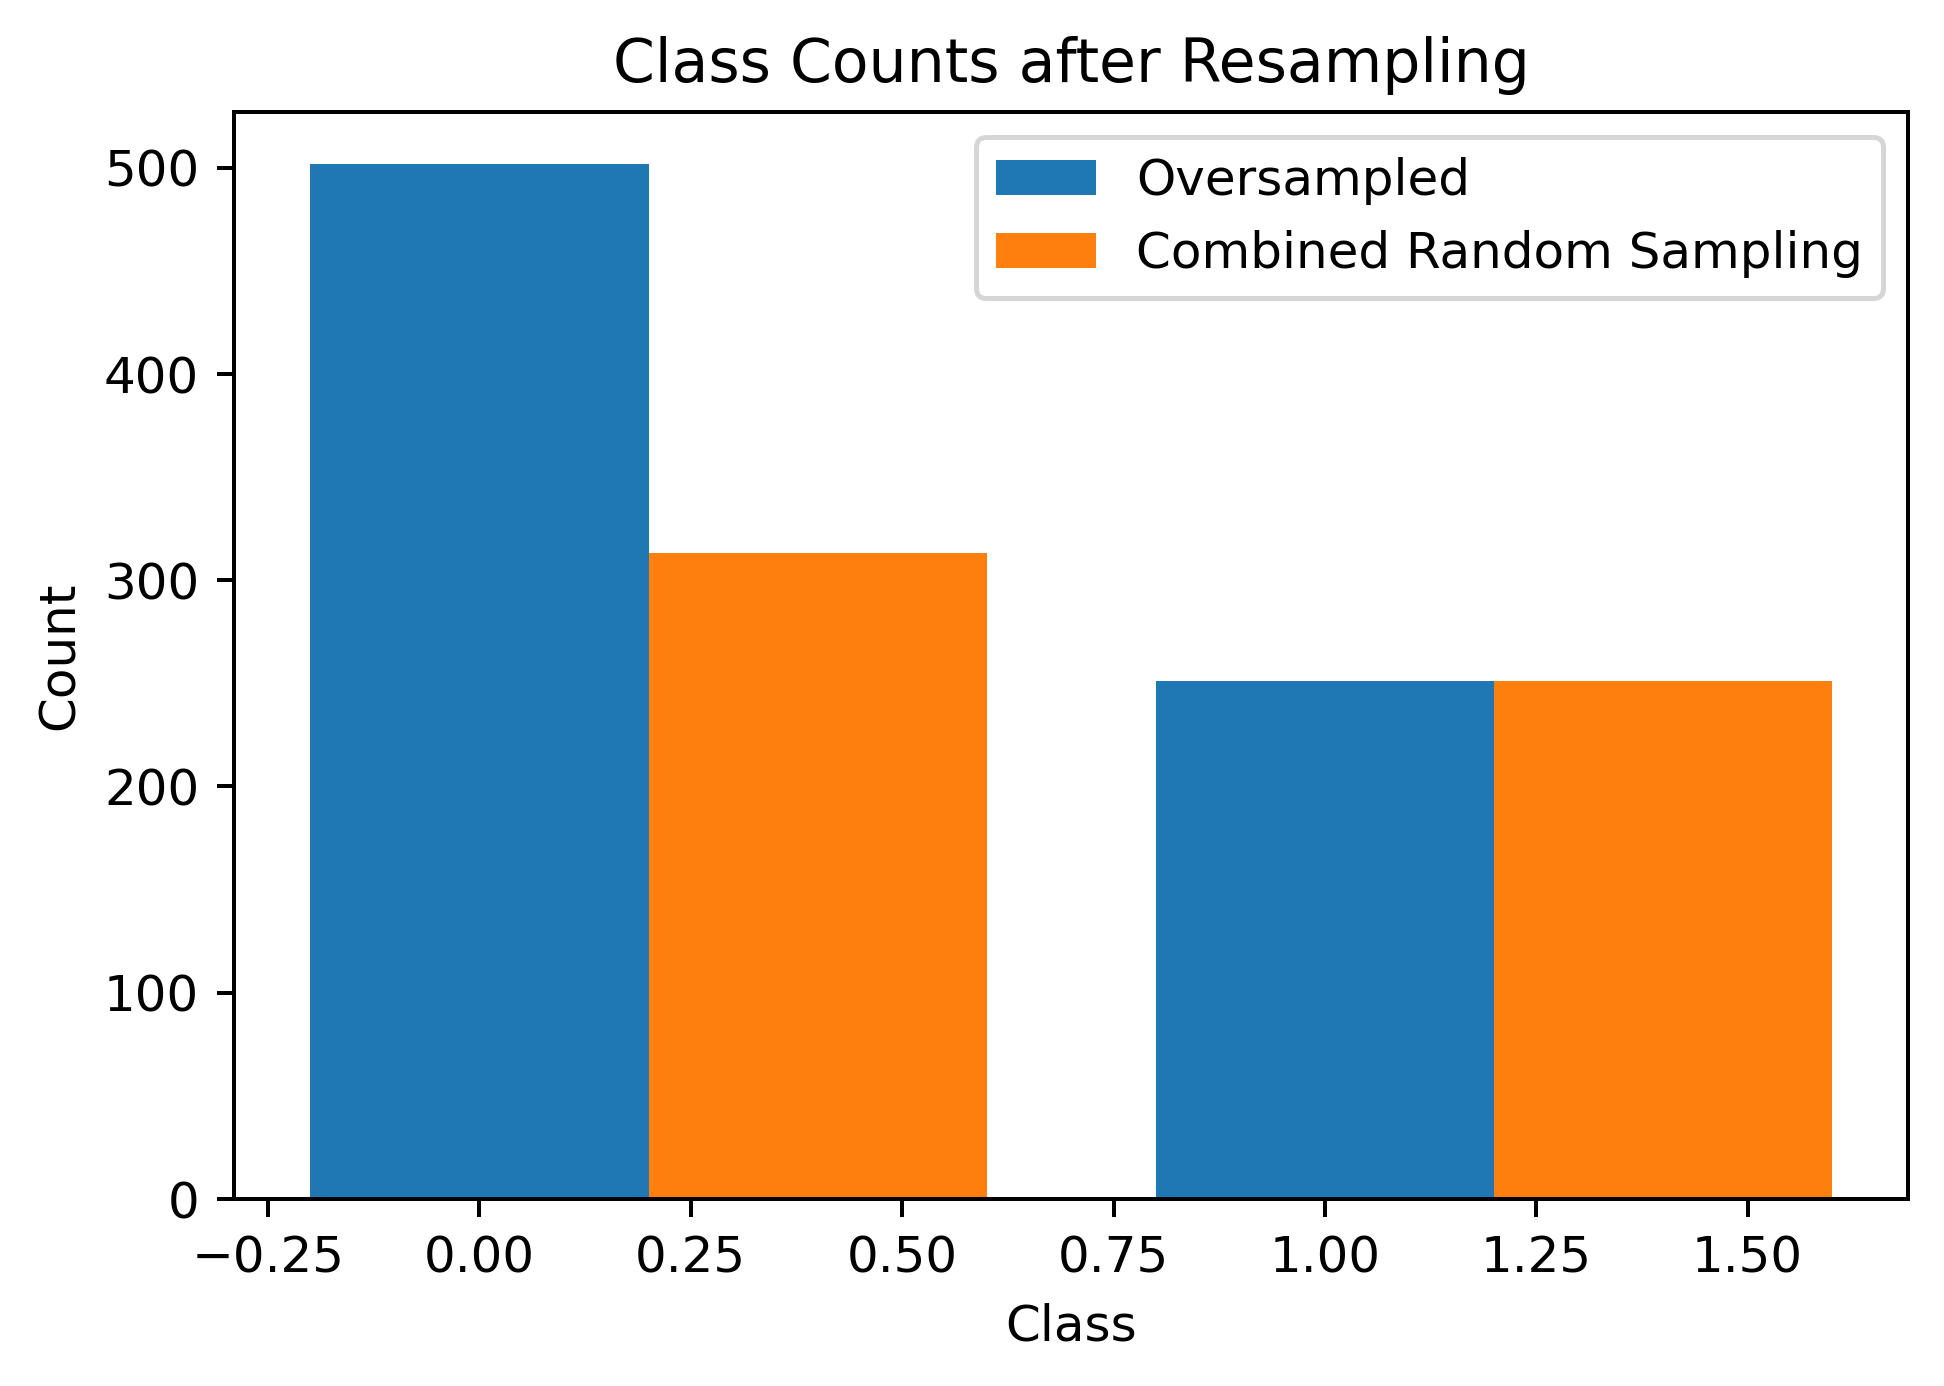

In [ ]:
# Calculate class counts
over_counts = Counter(y_over)
ou_counts = Counter(y_ou)

# Set the width of the bars
bar_width = 0.4

# Set the positions of the bars
bar_positions = np.arange(len(over_counts))

# Create the bars
plt.bar(bar_positions, over_counts.values(), width=bar_width, label="Oversampled")
plt.bar(bar_positions + bar_width, ou_counts.values(), width=bar_width, label="Combined Random Sampling")
plt.rcParams["figure.dpi"] = 360
# Add labels and title
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Counts after Resampling")

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
# print("Data after undersampling: ", X_ou)
# print("Labels after undersampling: ", y_ou)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_ou, y_ou, test_size=0.5, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train.ravel())
X_train=vectorizer.transform(X_train.ravel())
X_test=vectorizer.transform(X_test.ravel())
X_train=X_train.toarray()
X_test=X_test.toarray()

In [ ]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
length = X_train.shape[1]

model = Sequential()
model.add(Dense(100,input_shape=(length,) , activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', 
                           metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               79600     
                                                                 
 dense_1 (Dense)             (None, 64)                6464      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 90,289
Trainable params: 90,289
Non-traina

In [ ]:
earlystopping = callbacks.EarlyStopping(monitor='val_loss',
                                        mode='min',
                                        verbose=1,
                                        patience=5)

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=9,batch_size=128,callbacks =[earlystopping])

Epoch 1/9
3/3 [==============================] - 1s 137ms/step - loss: 0.7055 - accuracy: 0.5035 - val_loss: 0.6756 - val_accuracy: 0.6844
Epoch 2/9
3/3 [==============================] - 0s 22ms/step - loss: 0.6800 - accuracy: 0.6206 - val_loss: 0.6580 - val_accuracy: 0.9362
Epoch 3/9
3/3 [==============================] - 0s 22ms/step - loss: 0.6504 - accuracy: 0.7270 - val_loss: 0.6421 - val_accuracy: 0.9539
Epoch 4/9
3/3 [==============================] - 0s 22ms/step - loss: 0.6341 - accuracy: 0.7305 - val_loss: 0.6235 - val_accuracy: 0.9610
Epoch 5/9
3/3 [==============================] - 0s 21ms/step - loss: 0.6173 - accuracy: 0.7801 - val_loss: 0.6016 - val_accuracy: 0.9787
Epoch 6/9
3/3 [==============================] - 0s 29ms/step - loss: 0.5955 - accuracy: 0.8688 - val_loss: 0.5759 - val_accuracy: 0.9858
Epoch 7/9
3/3 [==============================] - 0s 40ms/step - loss: 0.5617 - accuracy: 0.8865 - val_loss: 0.5462 - val_accuracy: 0.9858
Epoch 8/9
3/3 [==================

In [ ]:
input_string = "Viral, seorang bocah diserang harimau saat makan https://beritaasli.com"

input_string = preprocessing(input_string)

print(input_string)
input_string = cv.transform([input_string]).toarray()
input_string = input_string[:, :795]

prediction = model.predict([input_string])
print(prediction)

if prediction > 0.4:
    print("The input string is likely to be spam.")
else:
    print("The input string is likely to be not spam.")

viral bocah serang harimau makan https beritaasli com
1/1 [==============================] - 0s 116ms/step
[[0.45054665]]
The input string is likely to be spam.


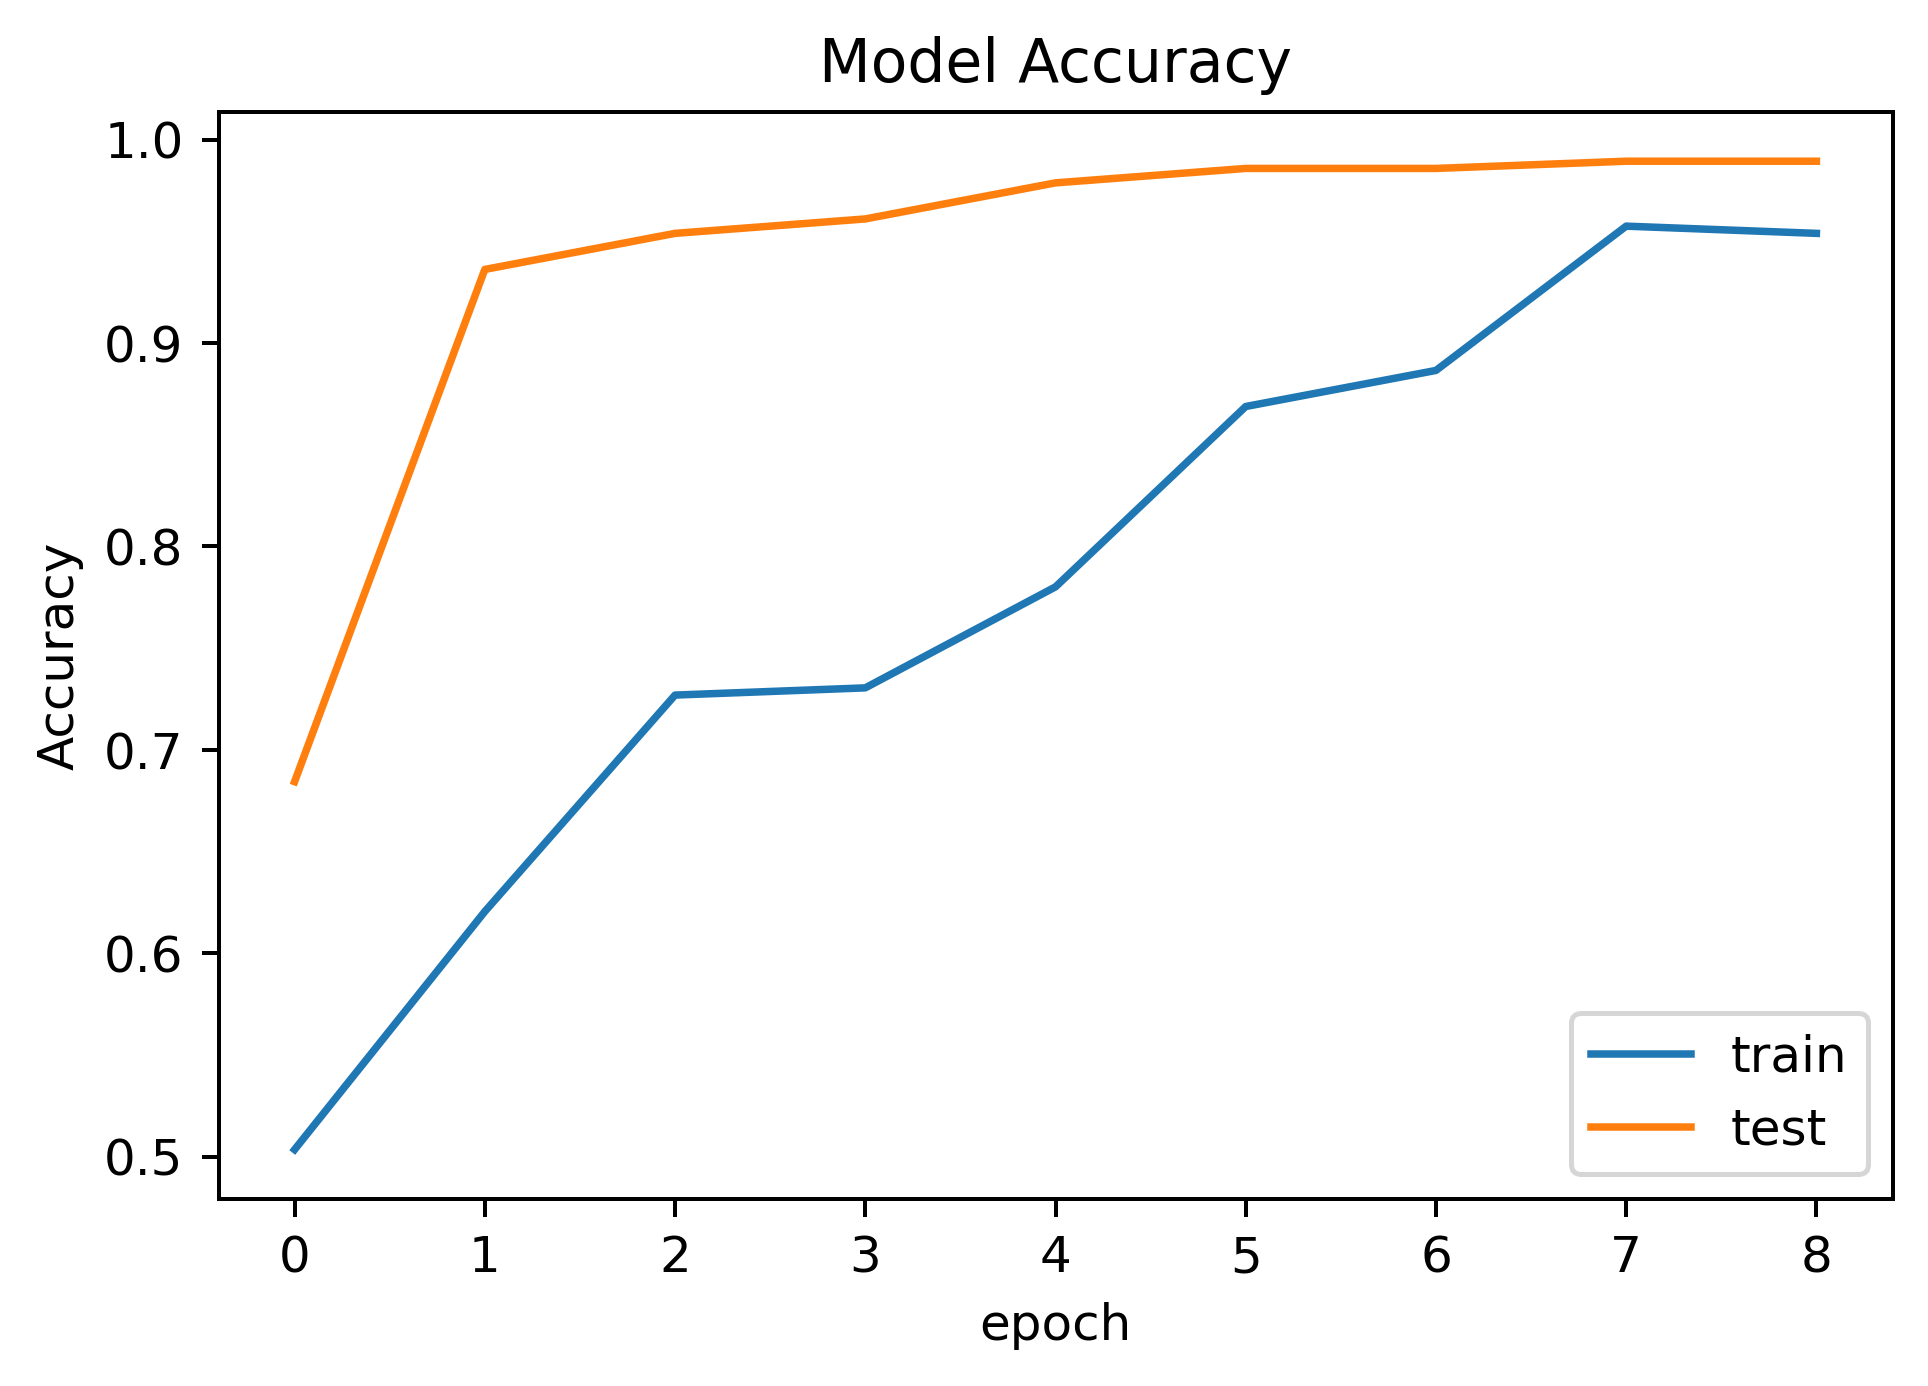

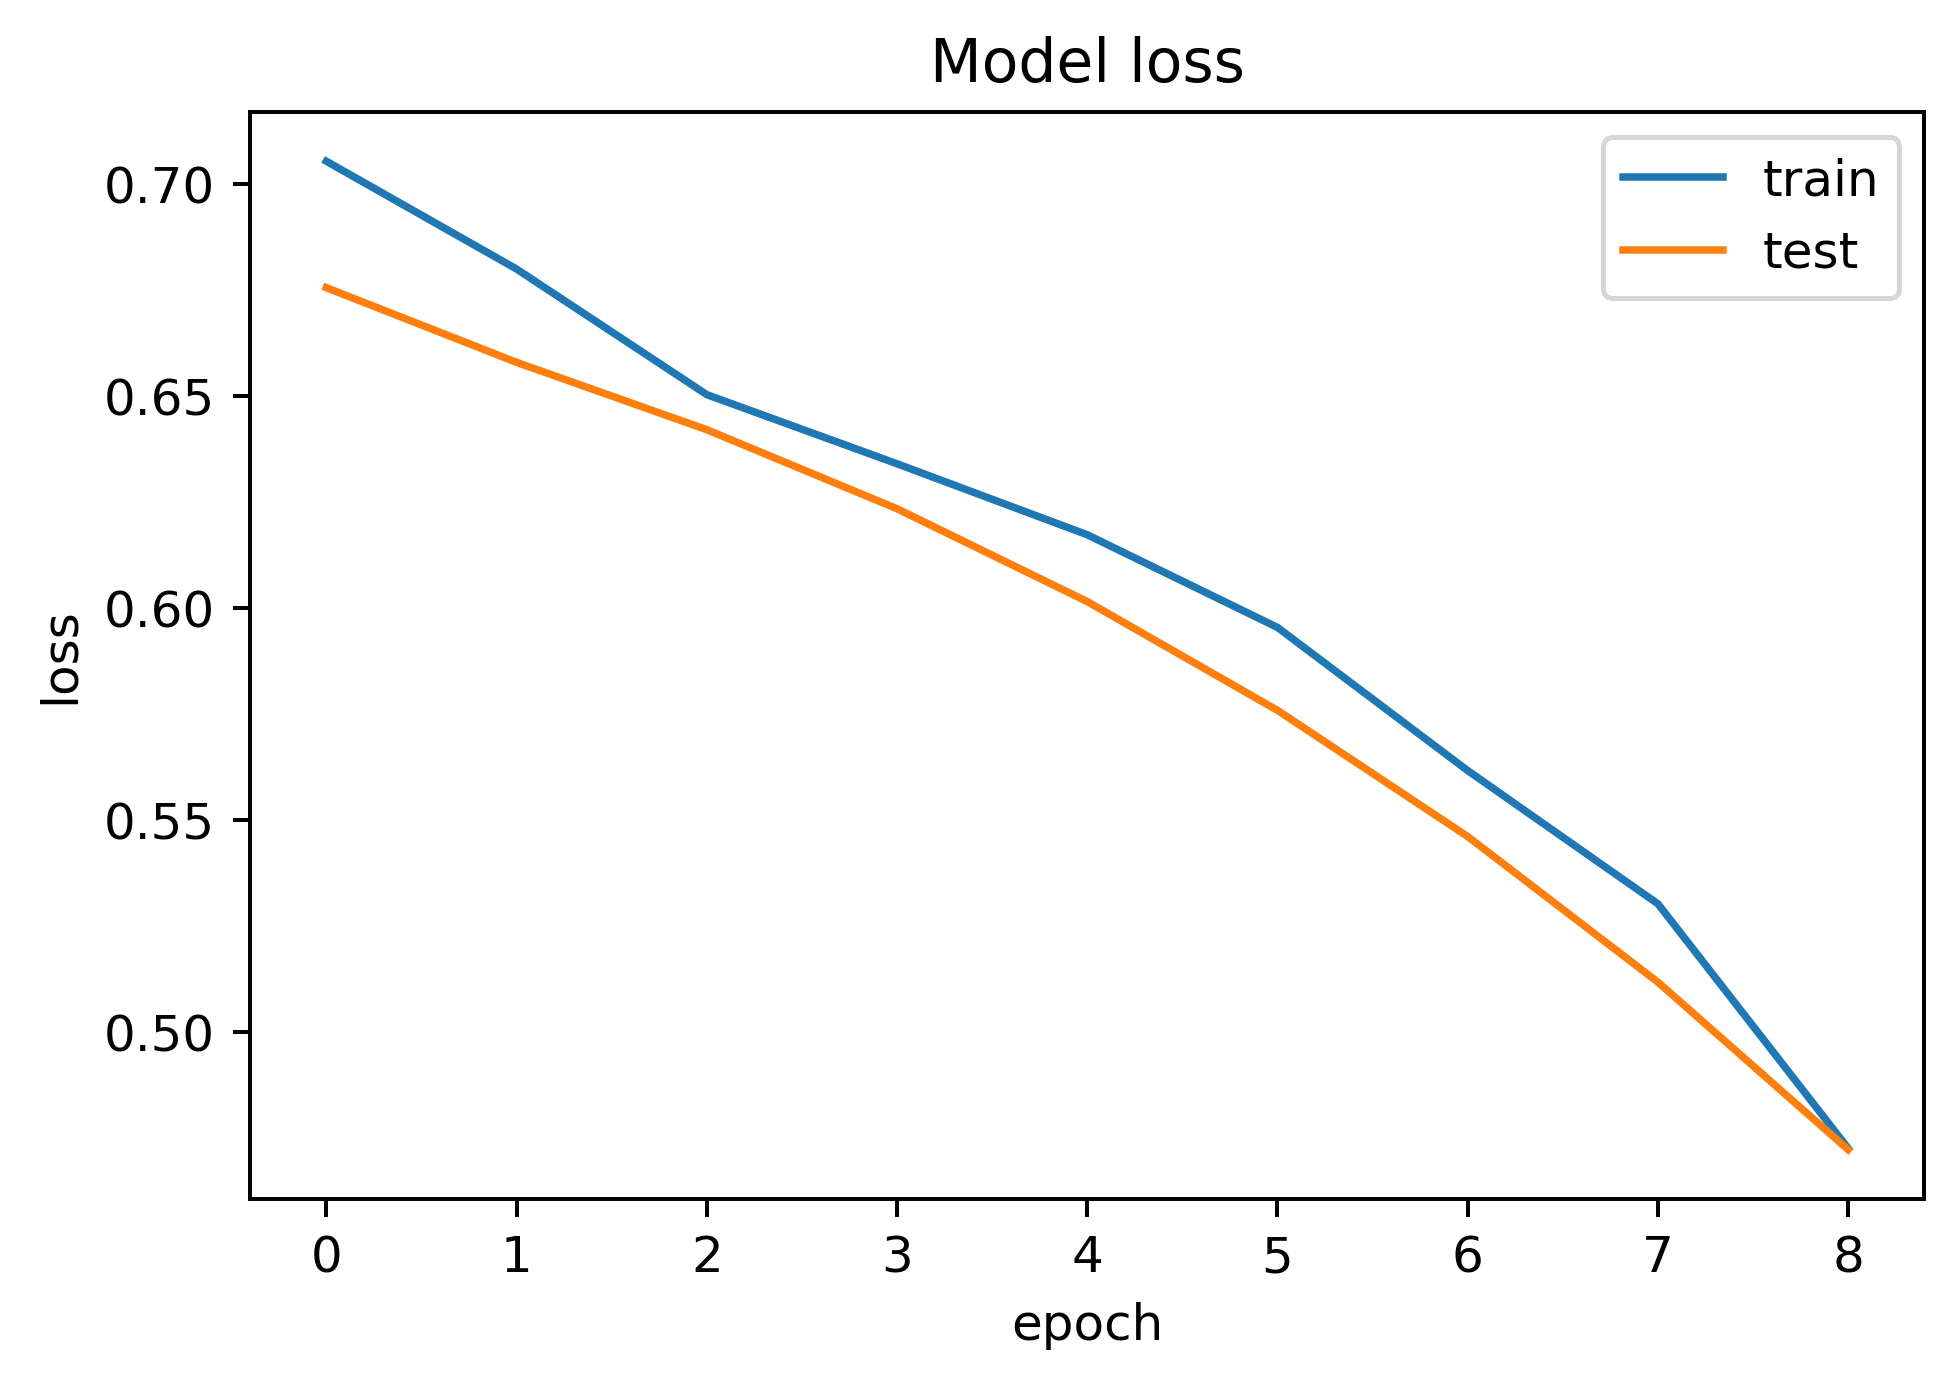

In [ ]:
# summarize history for acc
plt.rcParams["figure.dpi"] = 360
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.rcParams["figure.dpi"] = 360
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

9/9 [==============================] - 0s 4ms/step


In [ ]:
y_pred.sum()

122

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1:', f1)

Accuracy: 0.9893617021276596
Precision: 0.9754098360655737
Recall: 1.0
F1: 0.9875518672199171


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[160,   3],
       [  0, 119]])

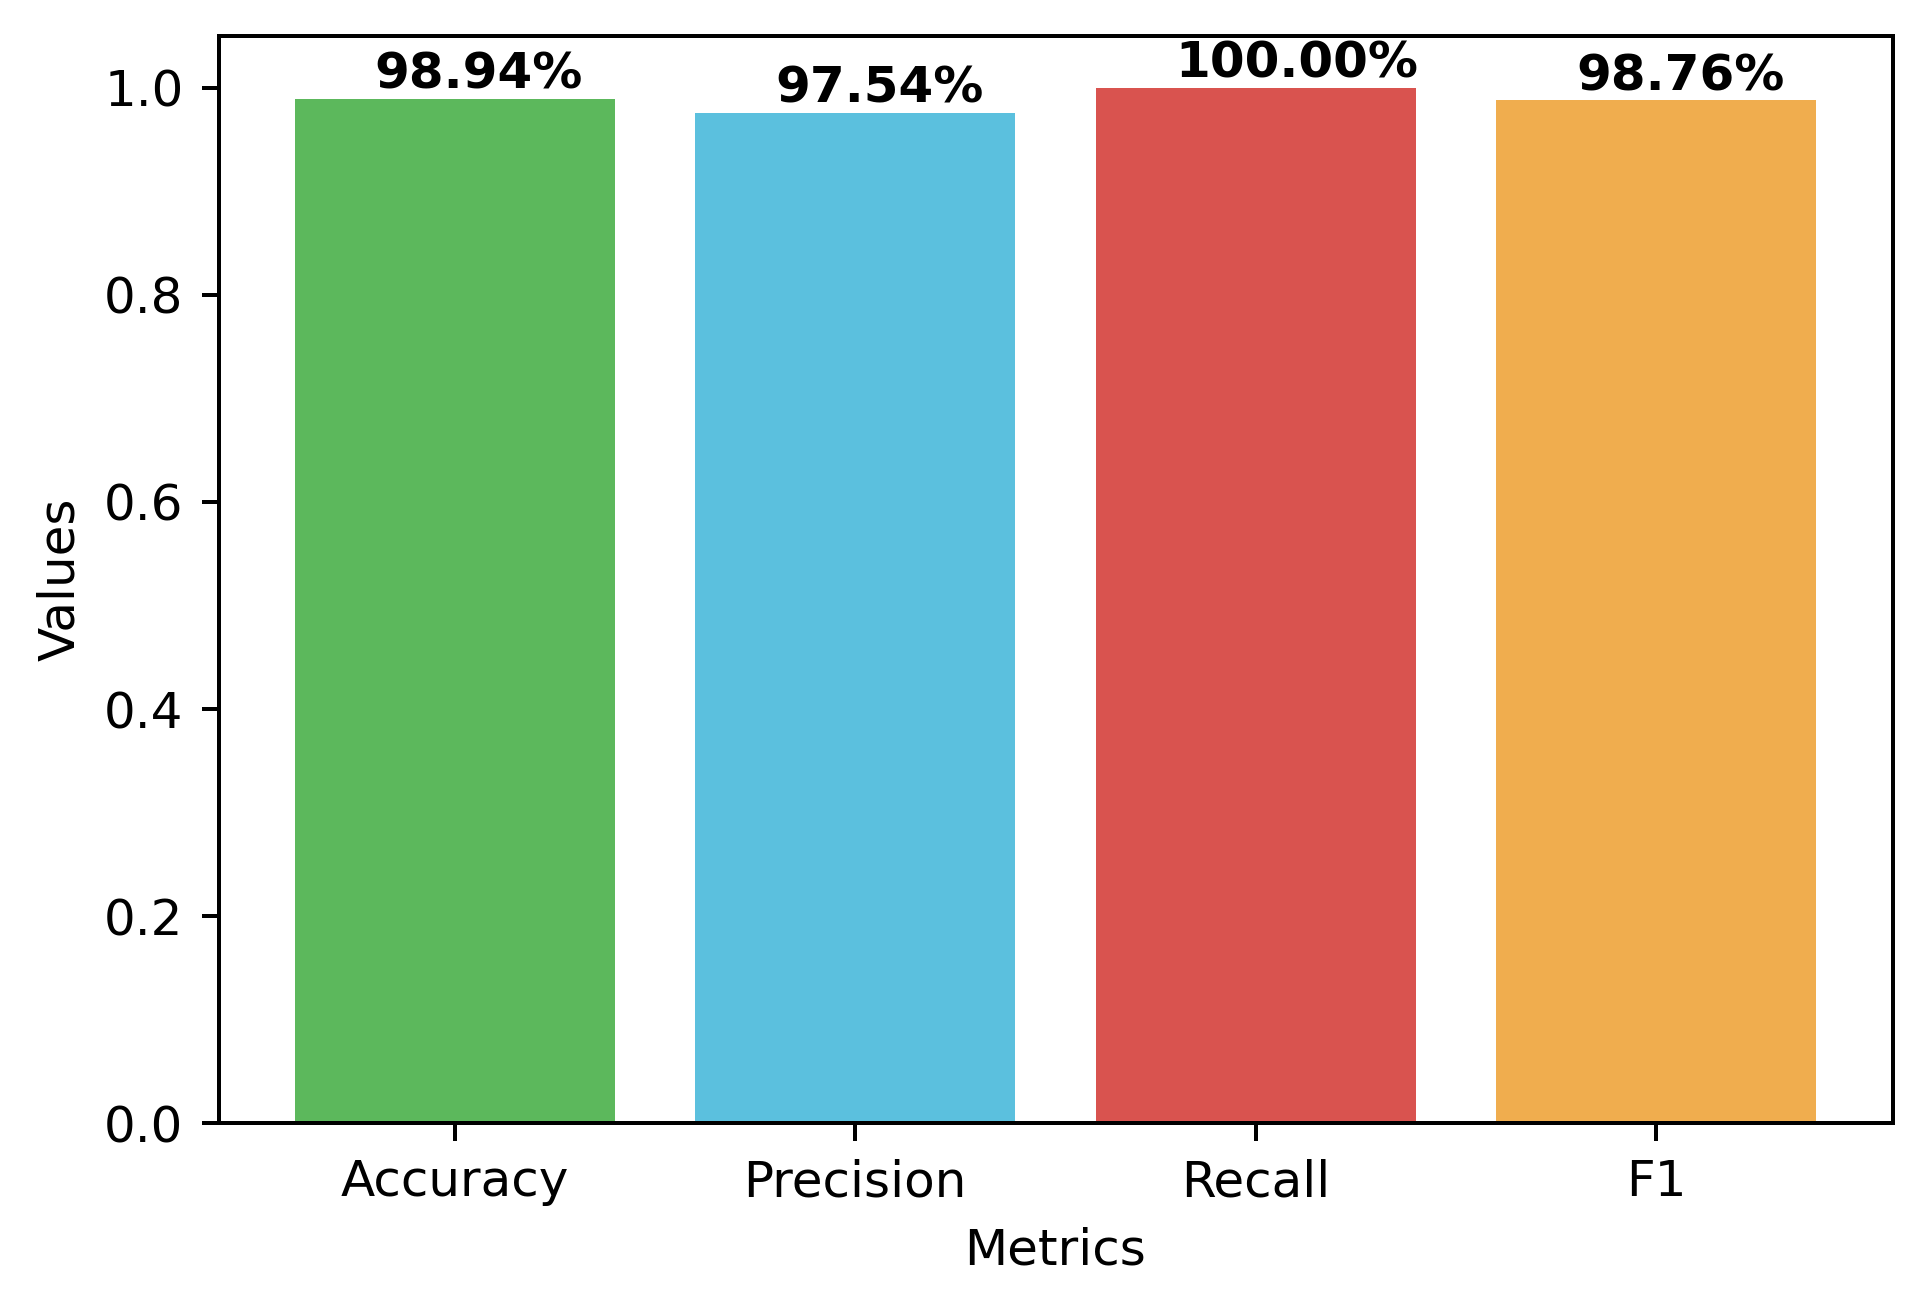

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
values = [accuracy, precision, recall, f1]
colors = ['#5cb85c', '#5bc0de', '#d9534f','#f0ad4e']

# create the figure and axes
plt.rcParams["figure.dpi"] = 360
fig, ax = plt.subplots()

# create the bar chart
ax.bar(metrics, values, color=colors)

# add the labels
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')

# Add percentage values inside the bars
for i, v in enumerate(values):
    ax.text(i - 0.2, v + 0.01, f'{v * 100:.2f}%', fontweight='bold')

# display the chart
plt.show()

1
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
{'_stale': True, 'stale_callback': <function _stale_axes_callback at 0x7f70f17c6ee0>, '_axes': <matplotlib.axes._axes.Axes object at 0x7f7005b2f250>, 'figure': <Figure size 3600x2520 with 1 Axes>, '_transform': <matplotlib.transforms.CompositeGenericTransform object at 0x7f7005b1d550>, '_transformSet': True, '_visible': True, '_animated': False, '_alpha': None, 'clipbox': <matplotlib.transforms.TransformedBbox object at 0x7f7005aa7e20>, '_clippath': None, '_clipon': True, '_label': '', '_picker': None, '_contains': None, '_rasterized': None, '_agg_filter': None, '_mouseover': False, 'eventson': False, '_oid': 0, '_propobservers': {}, '_remove_method': <built-in method remove of list object at 0x7f7009d99d80>, '_url': None, '_gid': None, '_snap': None, '_sketch': None, '_path_effects': [], '_sticky_edges': _XYPair(x=[], y=[]), '_in_layout': True, '_hatch_color': (0.0, 0.0, 0.0, 1.0), '_fill': True, '_original_edgec

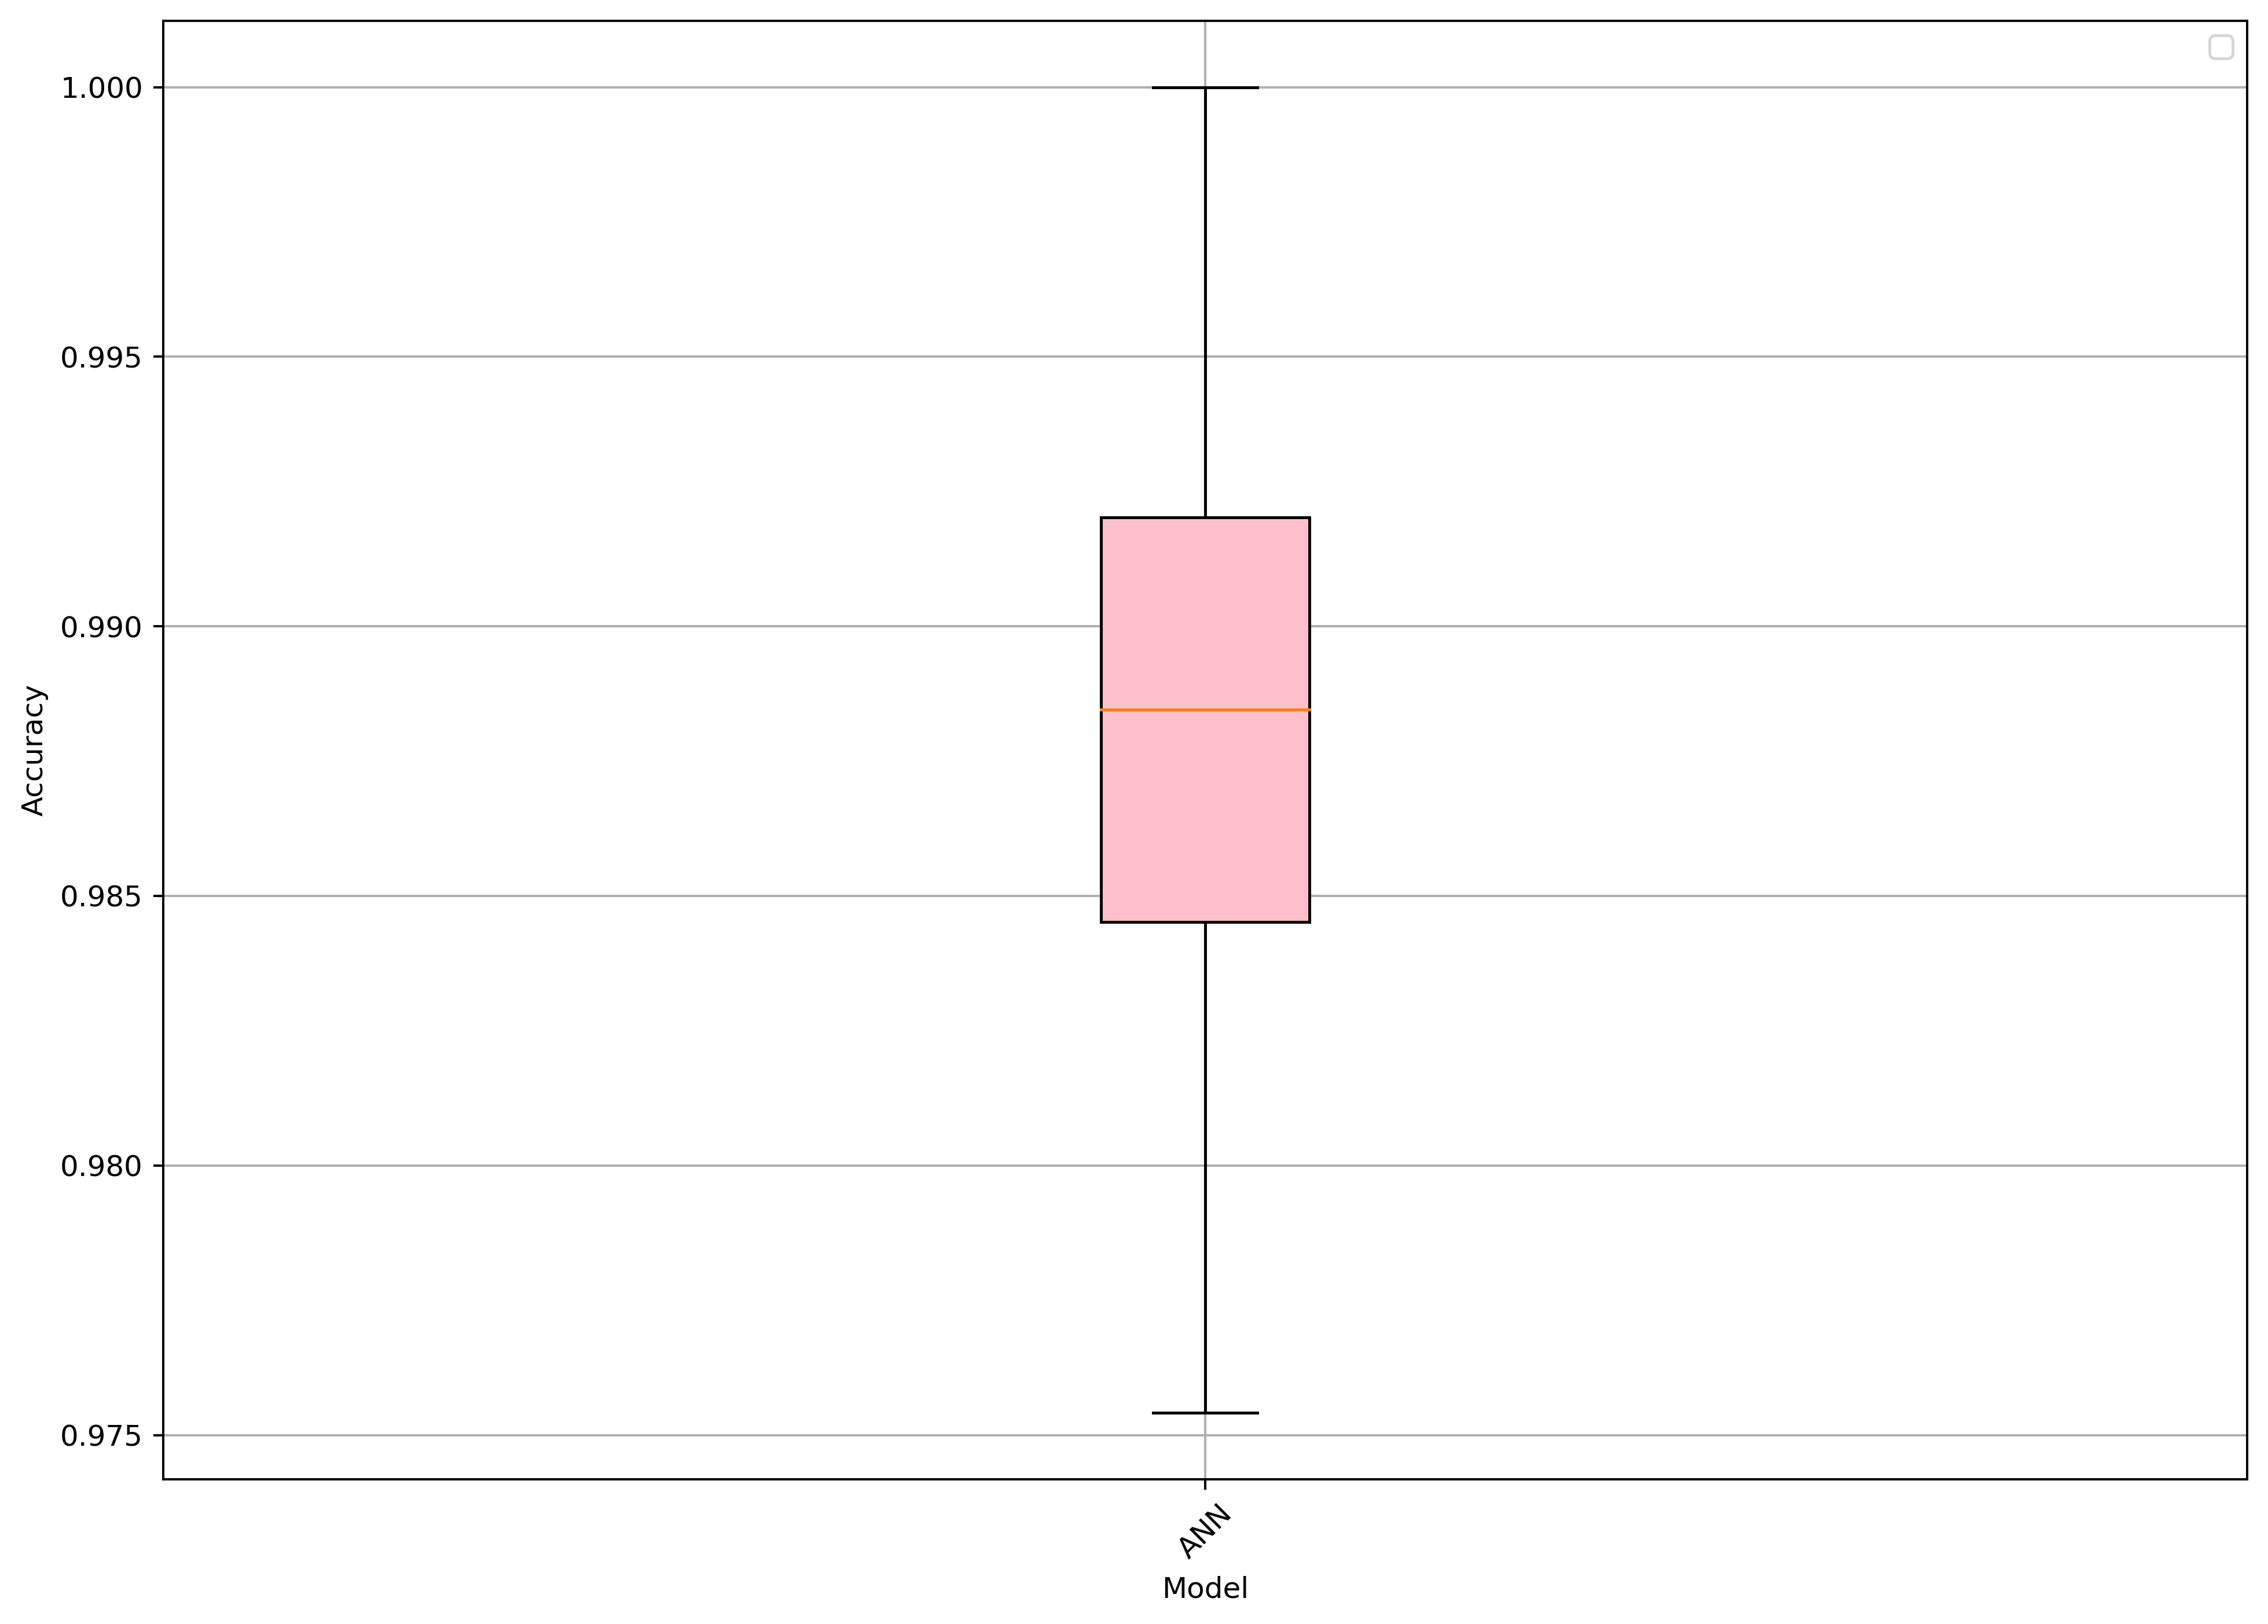

In [ ]:
plt.style.use('default')

# plt.style.use('ggplot')

plt.rcParams["figure.dpi"] = 360

#print(len(accss_transpose_selected))

#x = np.arange(len(accss_transpose_selected))

Method = [
    'ANN'
    # 'LR', 
    # 'SVR', 
    # 'KNNR', 
    # 'DTR', 
    # 'GBR', 
    # 'RFR', 
    # 'ABR', 
    # 'LLR', 
    # 'XBR', 
    # 'NR',
          ]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

x_axis = np.arange(1,len(Method)+1)

width = 0.1
 
# Creating plot
bpA = ax.boxplot(values, widths=width, patch_artist=True, positions=x_axis)
plt.xticks(x_axis, Method, rotation = 45)

boxes = bpA['boxes']

print(len(boxes))

patch = boxes[0]

print(bpA.keys())
print(patch.__dict__)
print(dir(patch))

# fill with colors
colors = [
    'pink', 
    # 'pink', 
    # 'pink', 
    # 'pink', 
    # 'pink', 
    # 'pink', 
    # 'pink', 
    # 'pink', 
    # # 'pink', 
    # 'pink', 
    ]

for patch, color in zip(boxes, colors):
    patch.set_facecolor(color)

#ax.set_title('KNN Accuracy by Data Size and Undersampling Method', size=24)
#ax.set_ylabel('Score', size=24)
#ax.set_xlabel('Model(Data Size) + Undersampling Method', size=24)
#ax.set_xticks(x+1, range(min,(min*n)+1,min))
# ax.scatter(x_axis-width, HasilA, color="pink", label="CV = 2")
ax.legend()
ax.set_xlabel("Model")
# ax.set_ylabel("$R^2$")
ax.set_ylabel("Accuracy")
plt.grid()
plt.show()

Accuracy Score: 98.93617021276596 %


Text(0.5, 134.59999999999997, 'Predicted')

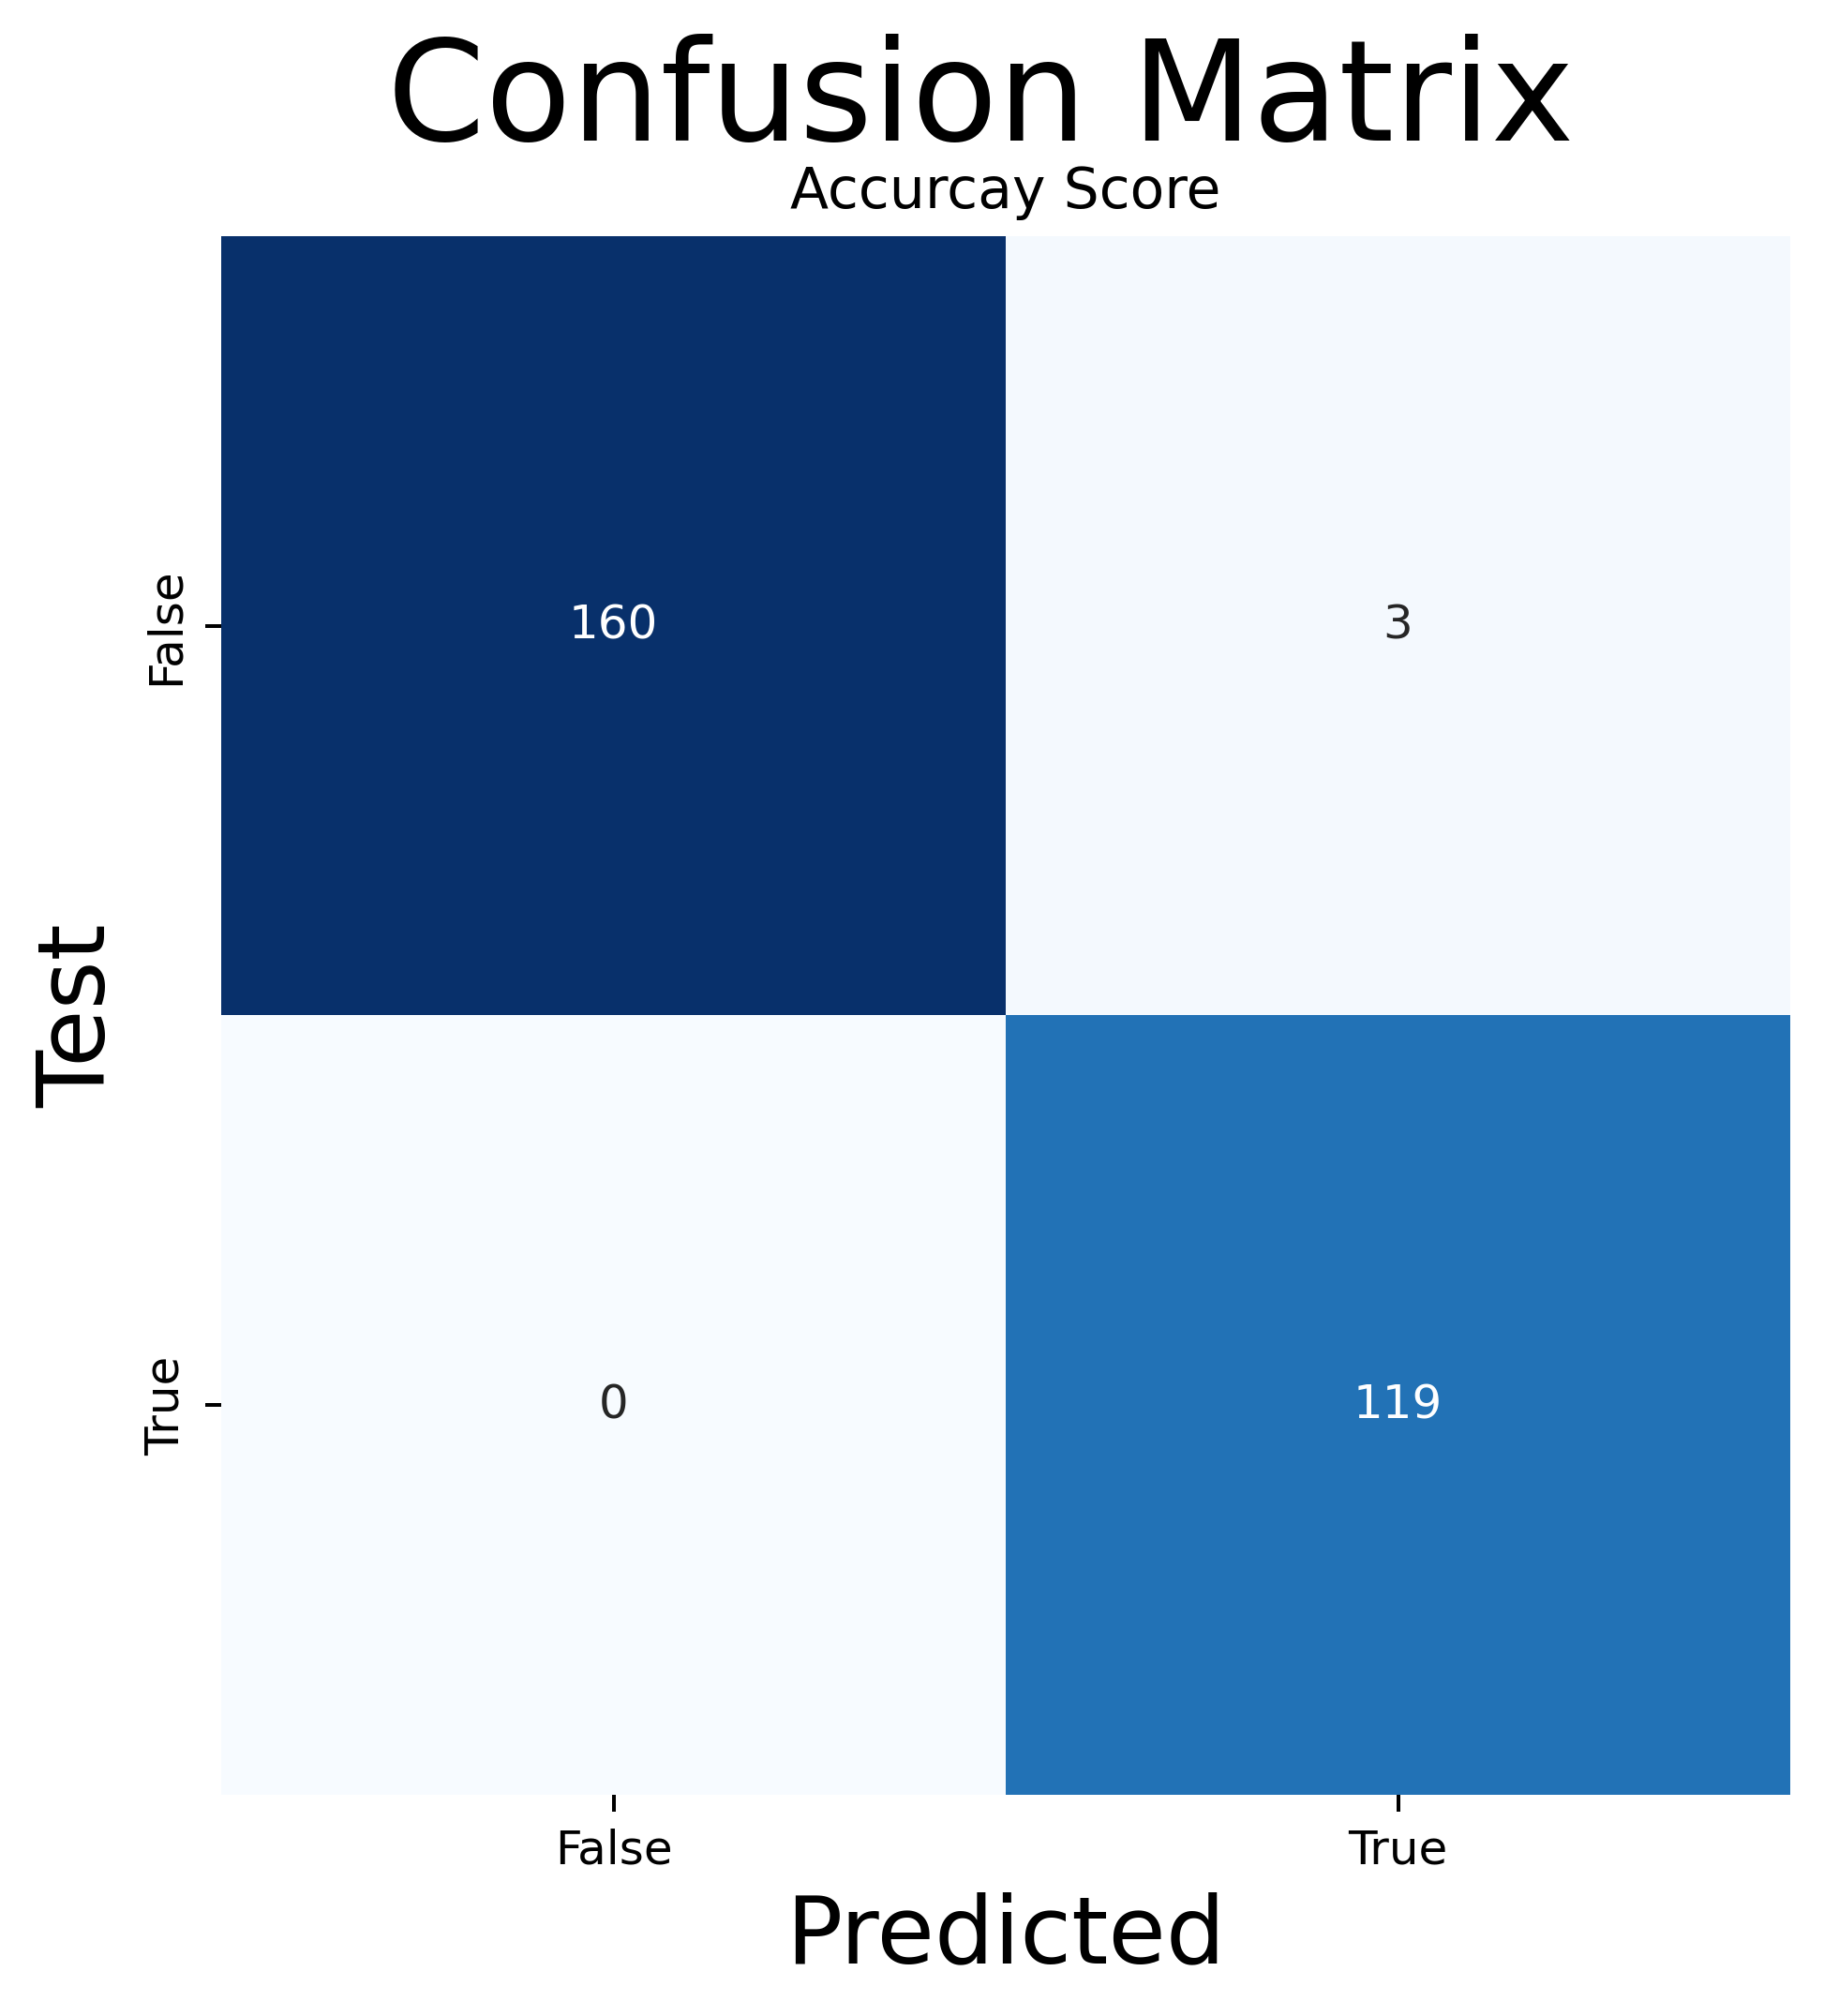

In [ ]:
print("Accuracy Score:", accuracy_score(y_test,y_pred)*100,"%")

fig, ax = plt.subplots(1,figsize=(6,6))
plt.rcParams["figure.dpi"] = 360
labels=['False','True']
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt='g', cbar=False,ax=ax)
plt.suptitle('Confusion Matrix', fontsize=30)
ax.set_title('Accurcay Score')
ax.set_yticklabels(labels);
ax.set_xticklabels(labels);
ax.set_ylabel('Test',fontsize=20)
ax.set_xlabel('Predicted',fontsize=20)